<a href="https://colab.research.google.com/github/huxe/Machine-learning/blob/master/Singnature_pixel_match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import pandas as pd
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
def imageMorf(img):

# load color image
# im = cv2.imread('prac/train/p1/001_01.PNG')
  im=img
  # smooth the image with alternative closing and opening
  # with an enlarging kernel
  morph = im.copy()

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
  morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
  morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 6))

  # take morphological gradient
  gradient_image = cv2.morphologyEx(morph, cv2.MORPH_GRADIENT, kernel)

  # split the gradient image into channels
  image_channels = np.split(np.asarray(gradient_image), 3, axis=2)

  channel_height, channel_width, _ = image_channels[0].shape

  # apply Otsu threshold to each channel
  for i in range(0, 3):
      _, image_channels[i] = cv2.threshold(~image_channels[i], 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
      image_channels[i] = np.reshape(image_channels[i], newshape=(channel_height, channel_width, 1))

  # merge the channels
  image_channels =255- np.concatenate((image_channels[0], image_channels[1], image_channels[2]), axis=2)
  return image_channels
  # save the denoised image
  #     cv2.imwrite('train1/output.jpg', image_channels)


In [3]:
def crop(img):
  image_channels=img
  arr=[]
  arr2=[]
  for i in range(image_channels.shape[0]):
      if(sum(sum(image_channels[i,:,:])))!=0:
          arr.append(image_channels[i,:,:])
  arr=np.array(arr)
  start=0
  end=0
  for j in range(arr.shape[1]):
          if(sum(sum(image_channels[:,j,:])))!=0:
              start=j
              break
  for j in range(start,arr.shape[1]):
          if(sum(sum(image_channels[:,j,:])))==0:
              end=j
              break

  arr=arr[:,start:end,:]
  #     arr=cv2.resize(arr,(original.shape[1],original.shape[0]))
  # cv2.imwrite('train1/4.jpg', arr)
  return arr

In [5]:
def ShowImg(s1,s2,s3):
  # initialize the figure
  fig = plt.figure("Images")
  images = ("singnature 1", s1),("singnature 2", s2), ("singnature 3", s3)

  # loop over the images
  for (i, (name, image)) in enumerate(images):
      # show the image
      ax = fig.add_subplot(1, 3, i + 1)
      ax.set_title(name)
      plt.imshow(image, cmap = plt.cm.gray)
      plt.axis("off")

  # show the figure
  plt.show()

In [6]:
# load the images
singnature1 = cv2.imread('/content/drive/My Drive/singnature_pixel/1.png')
singnature2 = cv2.imread('/content/drive/My Drive/singnature_pixel/2.png')
singnature3 = cv2.imread('/content/drive/My Drive/singnature_pixel/3.png')

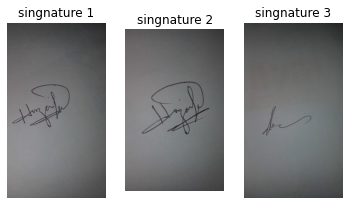

In [7]:
ShowImg(singnature1,singnature2,singnature3)

In [8]:
#apply morf
singnature1 = imageMorf(singnature1)
singnature2 = imageMorf(singnature2)
singnature3 = imageMorf(singnature3)

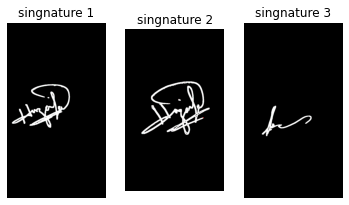

In [9]:
ShowImg(singnature1,singnature2,singnature3)

In [10]:
#Crop images
singnature1 = crop(singnature1)
singnature2 = crop(singnature2)
singnature3 = crop(singnature3)

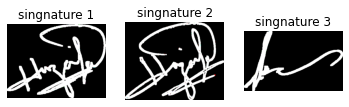

In [11]:
ShowImg(singnature1,singnature2,singnature3)

In [12]:
#Resize
singnature2 = cv2.resize(singnature2,(singnature1.shape[1],singnature1.shape[0]))
singnature3 = cv2.resize(singnature3,(singnature1.shape[1],singnature1.shape[0]))
# convert the images to grayscale
singnature1 = cv2.cvtColor(singnature1, cv2.COLOR_BGR2GRAY)
singnature2 = cv2.cvtColor(singnature2, cv2.COLOR_BGR2GRAY)
singnature3 = cv2.cvtColor(singnature3, cv2.COLOR_BGR2GRAY)

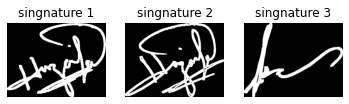

In [13]:
ShowImg(singnature1,singnature2,singnature3)

In [14]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [15]:
mseList=[]

def compare_images(imageA, imageB,title,msebool,count):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    mseList.append(m)
    for i in range(count):
      if max(mseList)==mseList[count] and count==2:
        msebool=False
      else:
        msebool=True
    count+=1
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f " % m +  str(msebool))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()



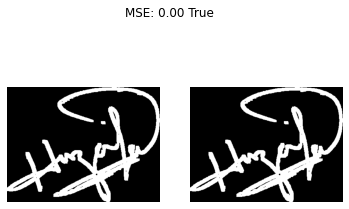

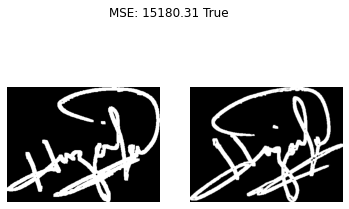

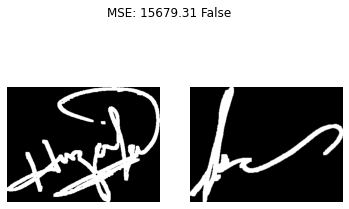

In [16]:
# compare the images
compare_images(singnature1, singnature1, "singnature 1 vs. singnature 1",True,0)
compare_images(singnature1, singnature2, "singnature 1 vs. singnature 2",True,1)
compare_images(singnature1, singnature3, "singnature 1 vs. singnature 3",True,2)